In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
%matplotlib inline
import matplotlib.pyplot as plt

sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
)

london_df = pd.read_csv('london.csv', parse_dates=['timestamp'])

## Task 1

In [20]:
london_df.isnull().sum()

## answer - нет 

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

## Task 2

KeyboardInterrupt: 

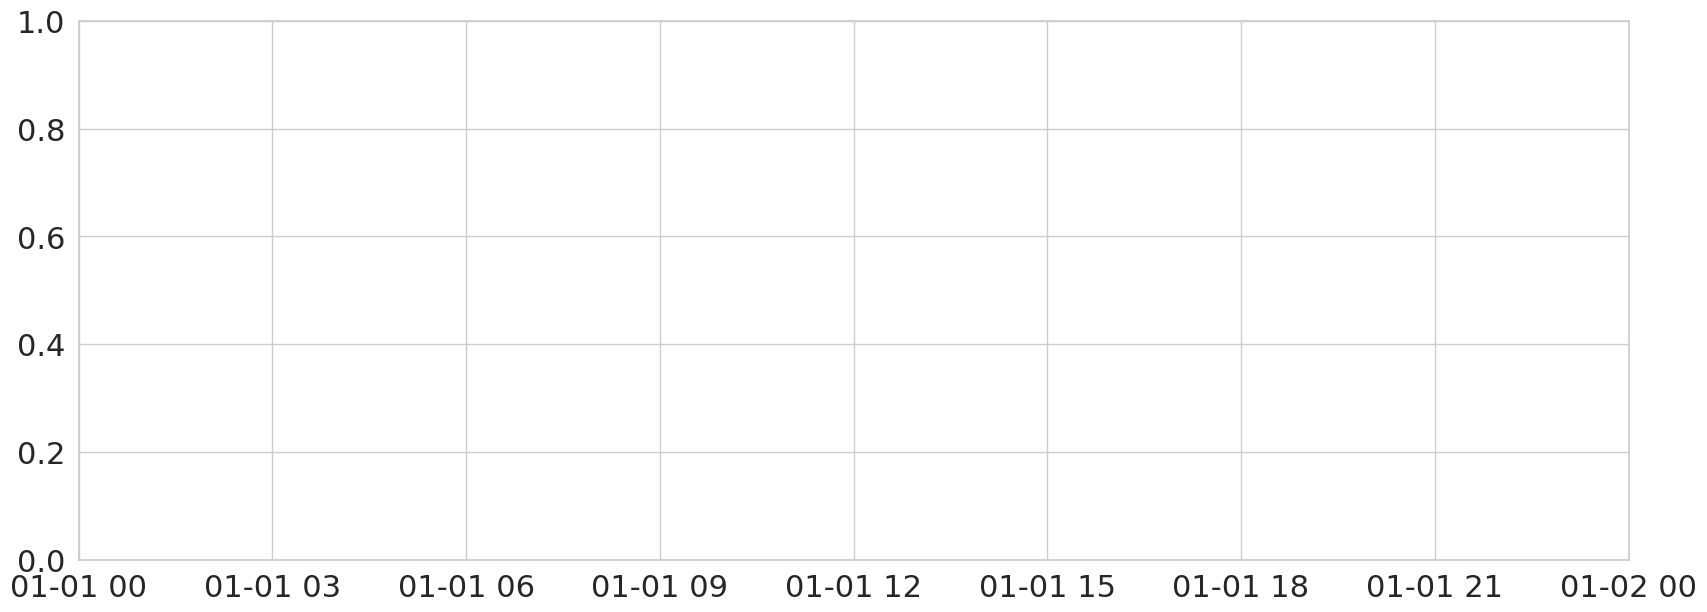

In [21]:
sns.lineplot(data=london_df, x='timestamp', y='cnt')
# answer - Очень сложно что-то понять, нужно преобразовать данные, чтобы увидеть тренды

## Task 3

<AxesSubplot: xlabel='timestamp', ylabel='rides'>

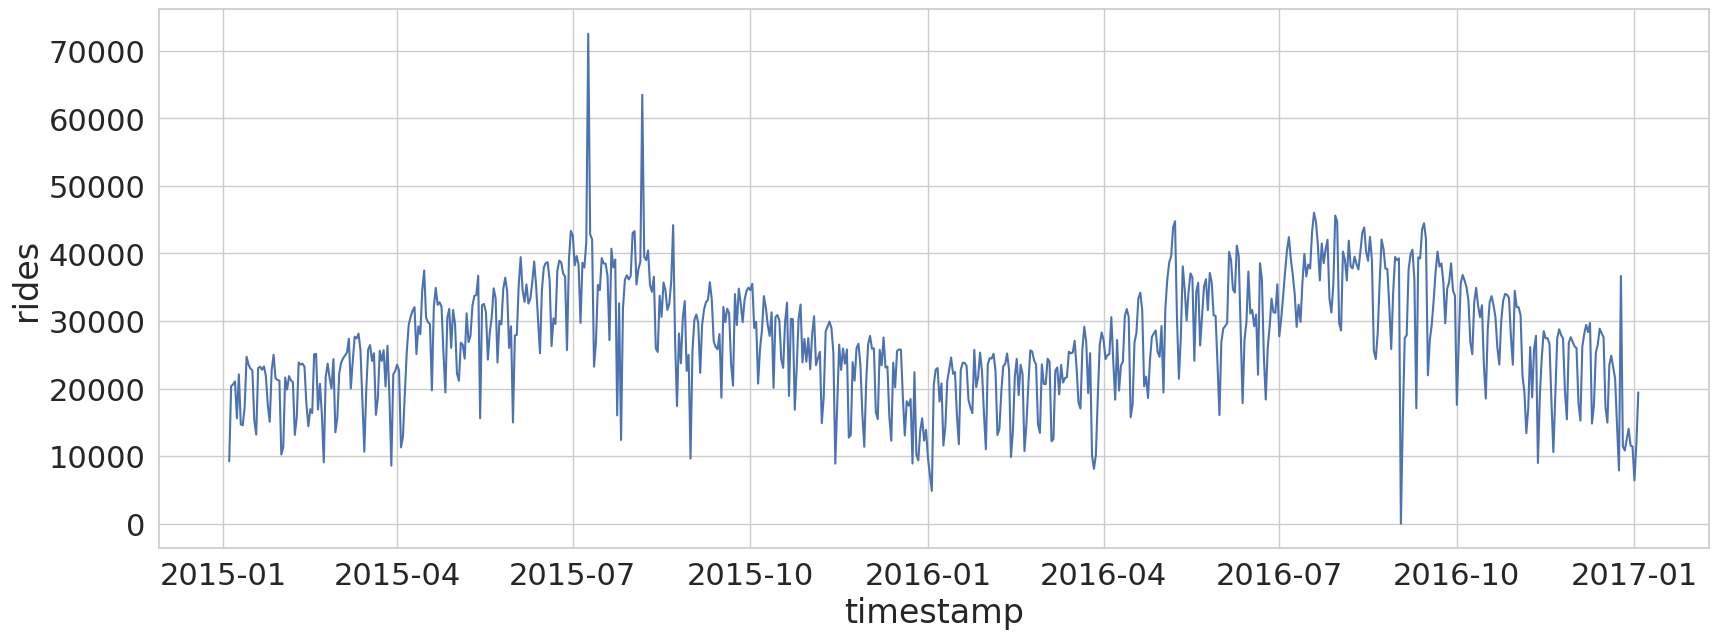

In [27]:
london_df_by_day = (
    london_df
    .resample(rule='D', on='timestamp')
    .agg(rides = ('cnt', 'sum'))
)

sns.lineplot(data=london_df_by_day, x='timestamp', y='rides')
## answer 
# 1. Зимой число аренд меньше, чем летом
# 2. Максимальное число аренд за день составляет более 70 000
# 3. Встречаются как очень резкие скачки числа аренд, так и падения

## Task 4

In [33]:
london_df_sma = (
    london_df_by_day
    .assign(sma = london_df_by_day.rides.rolling(window=3).mean())
    .reset_index()
)

london_df_sma.query("timestamp == '2015-07-09'")

,timestamp,rides,sma
186,2015-07-09,72504,50705.0


## Task 5

In [39]:
np.std(
    london_df_sma
    .assign(mean_diff = london_df_sma.rides - london_df_sma.sma)
    .mean_diff
)

4558.58664111794

## Task 6

In [42]:
london_df_sma = (
    london_df_sma
    .assign(upper_bound = london_df_sma.sma + 2.576*4558.58664111794,
            lower_bound = london_df_sma.sma - 2.576*4558.58664111794)
)

london_df_sma.tail(1)

,timestamp,rides,sma,upper_bound,lower_bound
730,2017-01-03,19436,12560.0,24302.919188,817.080812


## Task 7

In [44]:
london_df_sma.query("rides > upper_bound")
# answer - 2015-07-09

,timestamp,rides,sma,upper_bound,lower_bound
186,2015-07-09,72504,50705.000000,62447.919188,38962.080812
214,2015-08-06,63468,46627.333333,58370.252521,34884.414146
609,2016-09-04,27512,14259.000000,26001.919188,2516.080812
721,2016-12-25,36653,19650.666667,31393.585854,7907.747479


## Task 8 

In [45]:
# answer - Забастовки в метро

## Task 9 

In [46]:
london_df_sma.query("rides < lower_bound")
# answer - Ошибка при сборе данных

,timestamp,rides,sma,upper_bound,lower_bound
130,2015-05-14,15609,28709.333333,40452.252521,16966.414146
189,2015-07-12,23240,36036.666667,47779.585854,24293.747479
201,2015-07-24,16034,31013.666667,42756.585854,19270.747479
232,2015-08-24,17400,29529.333333,41272.252521,17786.414146
314,2015-11-14,8898,21037.333333,32780.252521,9294.414146
607,2016-09-02,0,26086.333333,37829.252521,14343.414146
615,2016-09-10,17080,31262.000000,43004.919188,19519.080812
621,2016-09-16,21967,36193.333333,47936.252521,24450.414146
678,2016-11-12,8990,20878.000000,32620.919188,9135.080812
